___
# Atividade: Análise Exploratória -  Variáveis Quantitativas
___

## Aula 04


<div id="indice"></div>

## Índice

- [Empresa de TV](#empresa-de-tv)


- [Análise Exploratória - Medidas resumo](#medidasresumo)
    - [Revisão do Exercício 2 da Aula 03](#ex2aula02)
    - [Revisão Exercício 3 da Aula 03](#ex3aula02)   
    - [Relembrando uso de `describe()` e `groupby(by= )`](#describe_groupby)
    - [Relembrando a interpretação: **Exercicio 5** do notebook da **Aula03_Atividade**](#interpretacao)
    
    
- [Análise Exploratória - Histograma](#histograma)
    - [Exercício 1](#ex1)
    - [Como construir um histograma com AMPLITUDES IGUAIS](#ampliguais)
    - [Como construir um histograma com AMPLITUDES DESIGUAIS](#ampldesiguais)
    - [Exercício 2](#ex2) 
    

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
import numpy as np

# Para ter melhor print
from IPython.display import display

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
d:\main\edu\insper\2sem\cdados\CD22-2\aula04


___
<div id="empresa-de-tv"></div>

# Empresa de TV

<img src="empresaTV.jpg" height="400">

Fonte: extraído da internet

Uma empresa de TV via satélite criou recentemente dois tipos de planos de canais (A e B).

A empresa tem como objetivo estudar o perfil dos clientes que aderiram ao plano para enviar malas diretas aos potenciais clientes de cada tipo de plano.

A base de dados apresenta algumas variáveis para uma amostra de 82 clientes selecionados aleatoriamente dentre aqueles que aderiram aos planos. As variáveis têm os seguintes significados:

* CLIENTE: identificador do cliente.
* PLANO: apresenta o plano adquirido pelo cliente – (1=A ou 2=B). 
* EC: apresenta estado civil do cliente no momento da adesão ao  plano – (1=Casado, 2=Solteiro e 3=Outros).
* SATISFACAO: grau de satisfação do cliente pelo plano – 
	(5=Muito satisfeito, 4=Satisfeito, 3=Indiferente, 2=Insatisfeito e 1=Muito insatisfeito).
* RENDA: renda pessoal do cliente, em milhares de reais.

O arquivo `EmpresaTV Cod.xlsx` contém as variáveis descritas acima.

<br>

**Leitura e Preparo da base de dados:**

In [3]:
dados = pd.read_excel('EmpresaTV_Cod.xlsx')

# Definições necessárias vistas na Aula 02
dados.PLANO = dados.PLANO.astype('category')
dados.EC = dados.EC.astype('category')
dados.SATISFACAO = dados.SATISFACAO.astype('category')
dados.RENDA = dados.RENDA.astype('float')

dados.PLANO.cat.categories = (['A', 'B']) # Seguindo a ordem [1,2]
dados.EC.cat.categories = (['Casado', 'Solteiro', 'Outros']) #Seguindo a ordem [1,2,3]

# Pelo fato de SATISFACAO ser ordinal
dados.SATISFACAO = pd.Categorical(dados.SATISFACAO, 
                                  categories = ['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 
                                                   'Satisfeito', 'Muito Satisfeito'], 
                                  ordered=True)

___
<div id="medidasresumo"></div>

# Medidas resumo

Para compreender as informações contidas em variáveis quantitativas, podemos recorrer ao cálculo de algumas medidas resumo como  por exemplo:
  * média: [pd.mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
  * percentis: [pd.quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)
  * desvio padrão: [pd.std()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)
  * variância: [pd.var()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)
  

<div id="ex2aula03"></div>

No **Exercicio 2** do notebook da **Aula03_Atividade**, foi pedido para segmentar a base de dados por plano e criar uma variável renda para cada plano.

A seguir, temos as respostas para esse exercício:


In [4]:
# Cria dataframes apenas com clientes do plano colocado no filtro de linhas
dados_a = dados.loc[dados['PLANO'] == 'A',:]
dados_b = dados.loc[dados['PLANO'] == 'B',:]

# Cria Series considerando apenas a coluna renda com clientes de um particular plano
renda_a = dados.loc[dados['PLANO'] == 'A','RENDA']
renda_b = dados.loc[dados['PLANO'] == 'B','RENDA']

#ou
renda_a = dados_a['RENDA']
renda_b = dados_b['RENDA']

<div id="ex3aula03"></div>

Já no **Exercicio 3** do notebook da **Aula03_Atividade**, foi pedido para imprimir tamanho amostral, média, primeiro quartil (percentil de ordem 25%), segundo quartil (mediana), terceiro quartil (percentil de ordem 75%), mínimo, máximo, desvio padrão e variância das rendas do clientes para cada plano A e B, separadamente.

A seguir, temos as respostas para esse exercício:


In [5]:
for plano, var_quanti in (('Plano A', renda_a), ('Plano B', renda_b)):
    print('-' * 40)
    print(plano)
    print('-' * 40)
    print(f'contagem               = {len(var_quanti)}')
    print(f'média                  = {var_quanti.mean():.3f}')
    print(f'mínimo                 = {var_quanti.min():.3f}')
    print(f'primeiro quartil (Q1)  = {var_quanti.quantile(q=0.25):.3f}')
    print(f'mediana          (Q2)  = {var_quanti.median():.3f}')
    print(f'terceiro quartil (Q3)  = {var_quanti.quantile(q=0.75):.3f}')
    print(f'máximo                 = {var_quanti.max():.3f}')
    print(f'variância amostral     = {var_quanti.var():.3f}')
    print(f'desvio padrão amostral = {var_quanti.std():.3f}')
    print()

----------------------------------------
Plano A
----------------------------------------
contagem               = 46
média                  = 10.422
mínimo                 = 0.700
primeiro quartil (Q1)  = 7.475
mediana          (Q2)  = 10.350
terceiro quartil (Q3)  = 13.200
máximo                 = 21.400
variância amostral     = 19.941
desvio padrão amostral = 4.466

----------------------------------------
Plano B
----------------------------------------
contagem               = 36
média                  = 5.689
mínimo                 = 0.600
primeiro quartil (Q1)  = 4.150
mediana          (Q2)  = 5.150
terceiro quartil (Q3)  = 6.375
máximo                 = 19.200
variância amostral     = 10.847
desvio padrão amostral = 3.293



<div id="describe_groupby"></div>

## Relembrando uso de `describe()` e `groupby(by= )`:

Outra maneira para obter as medidas resumo da variável `RENDA` segmentadas por `PLANO` é fazendo uso dos comandos `describe()` (**Exercício 4 do notebook Aula03_Atividade**) e `groupby(by= )` (**Exercício 6 do notebook Aula03_Exercício**).

Vamos lembrar como fazê-lo?

In [6]:
dados.groupby('PLANO').RENDA.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
PLANO,,,,,,,,
A,46.0,10.422,4.466,0.7,7.475,10.35,13.200,21.4
B,36.0,5.689,3.293,0.6,4.150,5.15,6.375,19.2


In [7]:
# Para aluno ver uso do display que não perde formatação e com print perderia
display(dados.groupby('PLANO').RENDA.describe())

display(dados.groupby('EC').RENDA.describe())

,count,mean,std,min,25%,50%,75%,max
PLANO,,,,,,,,
A,46.0,10.421739,4.465568,0.7,7.475,10.35,13.200,21.4
B,36.0,5.688889,3.293437,0.6,4.150,5.15,6.375,19.2


,count,mean,std,min,25%,50%,75%,max
EC,,,,,,,,
Casado,36.0,9.125000,5.247877,0.6,4.9,9.3,11.925,21.4
Solteiro,33.0,7.854545,3.967295,2.5,5.0,7.0,10.300,17.6
Outros,13.0,7.423077,4.290523,3.3,5.3,5.4,9.300,16.7


In [8]:
dados.groupby('PLANO').RENDA.describe().transpose()

PLANO,A,B
count,46.000000,36.000000
mean,10.421739,5.688889
std,4.465568,3.293437
min,0.700000,0.600000
25%,7.475000,4.150000
50%,10.350000,5.150000
75%,13.200000,6.375000
max,21.400000,19.200000


<div id="interpretacao"></div>

## Relembrando a interpretação:  **Exercicio 5** do notebook da **Aula03_Atividade**

Observe os todos esses resultados e tire conclusões sobre a renda dos clientes (em mil reais) em cada plano. 

Destaque sua interpretação também para dentro de cada plano e não só entre planos.

Interprete todos os resultados também em termos do objetivo do problema: renda é uma variável importante para traçar o perfil do cliente quanto a escolha do plano?

In [9]:
# Coloque sua interpretação aqui

[Volta ao Índice](#indice)

___
<div id="histograma"></div>

# Análise Exploratória - Histograma

O histograma é um gráfico adequado para representar as frequências (de contagem ou relativas) de variáveis OBRIGATORIAMENTE
**quantitativas**. 

No **eixo x**, tem-se a representação da **grandeza da variável quantitativa** que está sendo estudada.

No **eixo y**, o *default* considera a frequência absoluta (contagem). Entretanto, há dois importantes motivos que nos animam a utilizar a medida **densidade** alterando o argumento *density* para *True*, ou seja, `density=True`. Veja os motivos:
  * Considerar a densidade no eixo y, permite considerar faixas com amplitudes diferentes sem distorção de interpretação.
  * Considerar a densidade no eixo y, garante que a área do histograma seja igual a $1$ permitindo colocar curvas probabilísticas cuja área total também é $1$.

Para construí-lo considerando a biblioteca `matplotlib`, consulte [aqui](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

<div id="ex1"></div>

### EXERCÍCIO 1

Execute a célula a seguir e veja algumas possibilidades de histograma com a variável `RENDA` considerando todos os clientes.

Analise os quatro histogramas abaixo, observando:
 * o significado dos argumentos utilizados em cada caso;
 * o significado dos valores considerados no eixo x; e
 * o significado dos valores considerados no eixo y.

Um dos quatro histogramas está seguramente errado. Identifique-o e descreva o motivo.

<br> 

**Atenção:** 
 * Aproveite para compreender o uso do comando `plt.subplot(Número de linhas, Número de colunas, Posição do gráfico)`. 
 * Esse comando é útil para colocar vários gráficos dentro da mesma janela gráfica, cujo tamanho é dado em `plt.figure(figsize=(largura, comprimento)`.

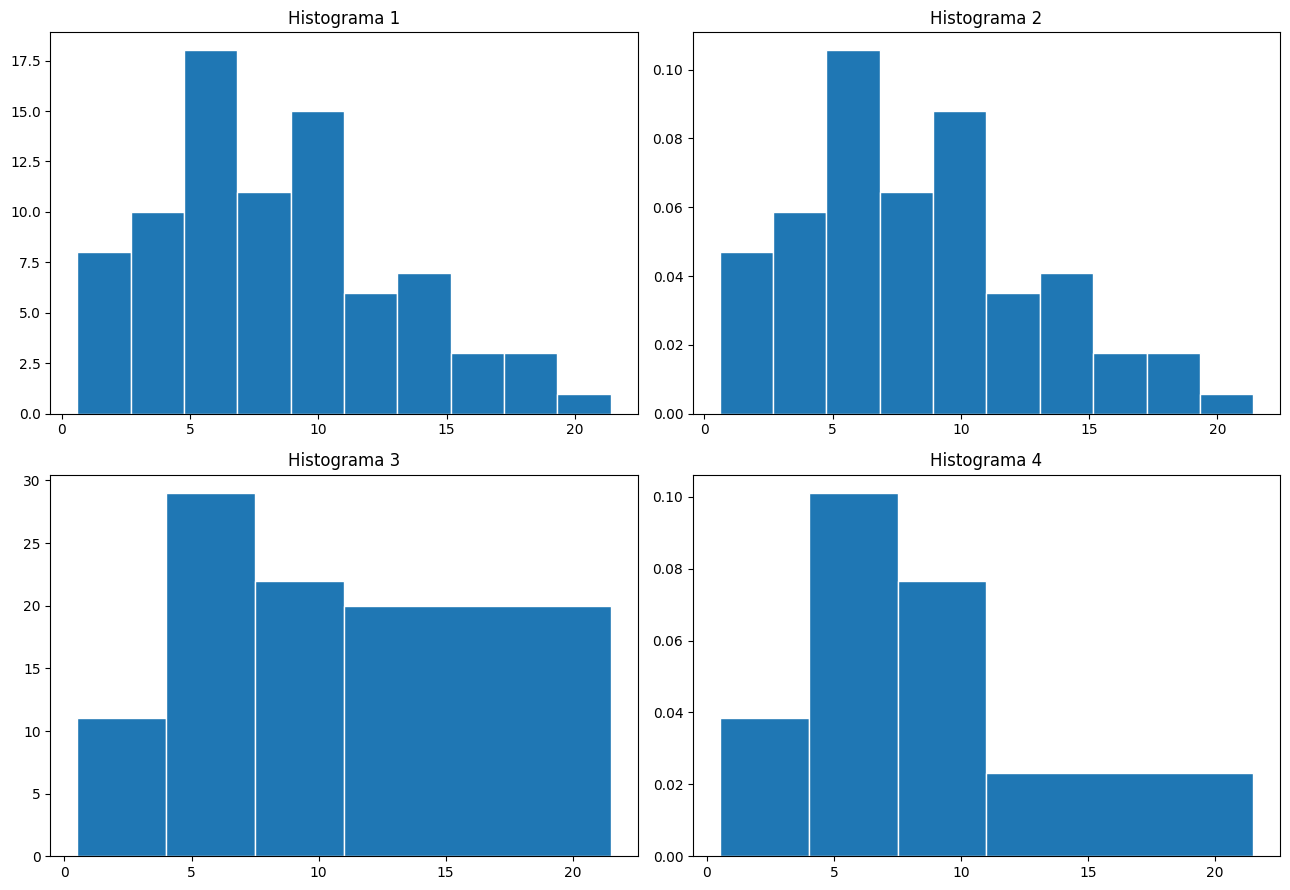

In [10]:
plt.figure(figsize=(13, 9))

plt.subplot(221) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.RENDA, edgecolor='white')
plt.title("Histograma 1")


plt.subplot(222) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 2
plt.hist(dados.RENDA, edgecolor='white', density=True)
plt.title("Histograma 2")


plt.subplot(223) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 3
plt.hist(dados.RENDA, bins=[0.5,4,7.5,11,21.5], edgecolor='white')
plt.title("Histograma 3")


plt.subplot(224) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 4
plt.hist(dados.RENDA, bins=[0.5,4,7.5,11,21.5], edgecolor='white', density=True)
plt.title("Histograma 4")


plt.tight_layout()
plt.show() # Fecha a janela gráfica. Use apenas uma vez para cada plt.figure()

In [11]:
# Coloque sua interpretação aqui



[Volta ao Índice](#indice)

<div id="ampliguais"></div>

##  Como construir um histograma com AMPLITUDES IGUAIS

Primeiro, é necessário estudar a variável quantitativa que será utilizada no histograma.

Abaixo, vamos construir um histograma para a variável `RENDA` considerando todos os clientes. Já sabemos algumas descritivas sobre essa variável, mas é importante lembrar que para definir as faixas de um histograma, antes deve fazer:

In [12]:
dados.RENDA.describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
RENDA,82.0,8.343902,4.620622,0.6,4.925,7.75,10.775,21.4


Observando os valores de renda mínimo e máximo que aparecem nesses dados, temos que a amplitude dos dados é igual a:

In [13]:
amplitude_dados = dados.RENDA.max()-dados.RENDA.min()
print(f'Amplitude dos dados: {amplitude_dados:.3f}')

Amplitude dos dados: 20.800


Assumindo que haja o interesse em construir um **histograma com 6 faixas**, por exemplo, então para sabermos o tamanho de cada faixa, podemos fazer a seguinte conta:

In [14]:
amplitude_faixa = amplitude_dados / 6
print(f'Amplitude de cada faixa: {amplitude_faixa:.3f} \n'
      f'Para facilitar na interpretação, vamos arredondar para uma casa decimal, \n'
      f'Ou seja, vamos considerar a amplitude de cada faixa igual a {amplitude_faixa:.1f}')

Amplitude de cada faixa: 3.467 
Para facilitar na interpretação, vamos arredondar para uma casa decimal, 
Ou seja, vamos considerar a amplitude de cada faixa igual a 3.5


### Dado o exposto acima, vamos considerar amplitudes iguais de tamanho $3.5$ mil reais para construir as faixas de renda.

Pelo fato dessas amplitudes não serem número inteiro, nesse caso, o comando `range` não irá funcionar.

Porém, o comando `arange` do `numpy` permite que os argumentos `start`, `stop` e `step` possam ser do tipo `float`.

In [15]:
from numpy import arange

In [16]:
# faixas de AMPLITUDES IGUAIS
faixa1 = arange(0.5,22,3.5)
faixa1

array([ 0.5,  4. ,  7.5, 11. , 14.5, 18. , 21.5])

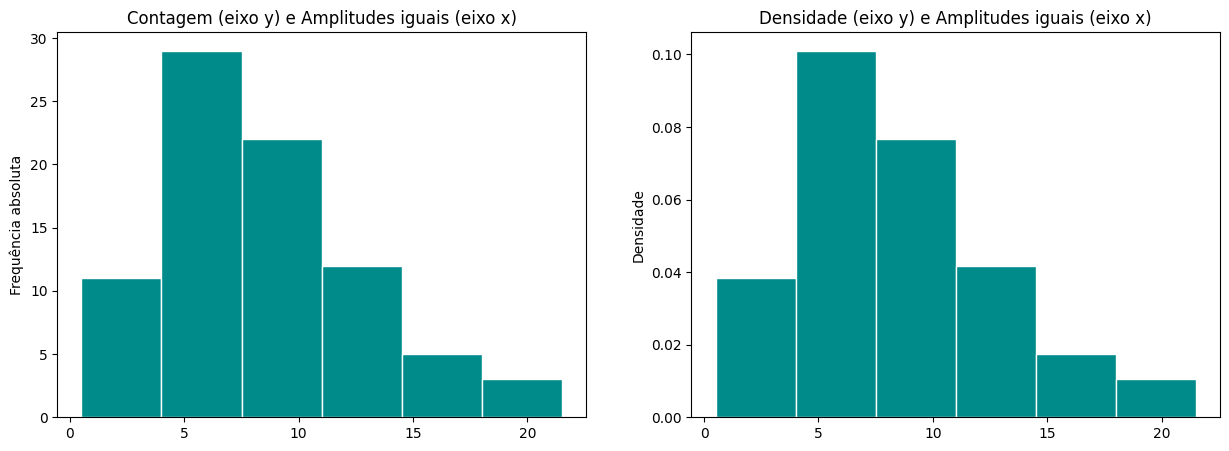

In [17]:
# Histograma da variável renda considerando faixas de AMPLITUDES IGUAIS
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(dados.RENDA, bins=faixa1, color='darkcyan', edgecolor='white')
plt.title('Contagem (eixo y) e Amplitudes iguais (eixo x)')
plt.ylabel('Frequência absoluta')

plt.subplot(122)
plt.hist(dados.RENDA, bins=faixa1, color='darkcyan', edgecolor='white', density=True)
plt.title('Densidade (eixo y) e Amplitudes iguais (eixo x)')
plt.ylabel('Densidade')

plt.show()

[Volta ao Índice](#indice)

<div id="ampldesiguais"></div>

## Como construir um histograma com AMPLITUDES DESIGUAIS

Para propor faixas com amplitudes desiguais, também é necessário estudar a variável quantitativa que será utilizada no histograma.

In [18]:
dados.RENDA.describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
RENDA,82.0,8.343902,4.620622,0.6,4.925,7.75,10.775,21.4


Observando os valores de renda mínimo e máximo que aparecem nesses dados, vamos propor faixas que seja igual ou menor do que o valor mínimo e vamos propor terminar em valor igual ou maior do que o valor máximo.

**Dica:** a variável aqui está em mil reais, então vamos usar números que facilitem na interpretação do gráfico.

In [19]:
# faixas de AMPLITUDES DESIGUAIS
faixa2 = [ 0.5, 4, 7.5, 11, 21.5]
faixa2

[0.5, 4, 7.5, 11, 21.5]

**ATENÇÃO:** Quando tivermos amplitudes desiguais, já vimos no [Exercício 1](#ex1) que o argumento `density=True` deverá ser sempre utilizado.

[Volta ao Índice](#indice)

<div id="ex2"></div>

### EXERCÍCIO 2

Faça dois histogramas com as seguintes restrições:
  * usar varável renda segmentada por plano (um histograma para cada plano)
  * usar densidade no eixo y
  * faixas com amplitudes iguais de tamanho $3$ 
  * iniciar faixa em $0.5$
  * use o comando `arange` da biblioteca `numpy` para construir essas faixas. Busque a sintaxe desse comando no seu navegador
  * use plt.subplot() com 1 linha e 2 colunas
  * use as cores descritas [aqui](https://matplotlib.org/stable/gallery/color/named_colors.html), caso queira incrementar a visualização dos histogramas. Leia [aqui](https://marketingpordados.com/marketing/data-visualization-x-dashboards-entenda-qual-e-diferenca-2/) e [aqui](https://aodigital.com.br/data-visualization/) para saber a importância do DataViz.

In [20]:
from numpy import arange

In [21]:
# Coloque se código aqui

[Volta ao Índice](#indice)